In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.values[:, 1:]
Y = df.values[:, 0]
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


In [4]:
split = int(0.8 * X.shape[0])
print(split)

33600


In [5]:
x_train = X[:split, :]
y_train = Y[:split]

x_test = X[split:, :]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [6]:
def dist(x1, x2) :
    return np.sqrt(sum((x1-x2)**2))

In [7]:
def knn(X, Y, queryPoint, k = 5) :
    vals = []
    m = X.shape[0] # Total points
    for i in range(m) :
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
    vals = sorted(vals)
    # Nearest/First k points
    vals = vals[:k]
    vals = np.array(vals)
    # print(vals)
    new_vals = np.unique(vals[:,1], return_counts = True)
    # print(new_vals)
    max_freq_index = new_vals[1].argmax()
    pred = new_vals[0][max_freq_index]
    return pred

In [8]:
# Each point(sample has 784 dimensions instead of 2
# But our dist function is generalised(vectorised))

In [22]:
def drawImg(x, pred = -1, lbl = -1) :
    plt.imshow(x.reshape(28, 28), cmap = 'gray')
    plt.axis("off")
    plt.title("Prediction " + str(lbl) + ", Label " + str(pred))
    plt.show()

In [23]:
query_point = x_test[1]

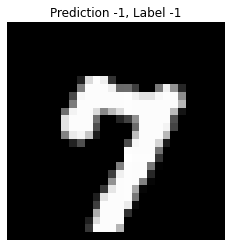

In [24]:
drawImg(query_point)

In [12]:
print(knn(X, Y, query_point, 10))

7.0


In [13]:
query_point = x_test[5]

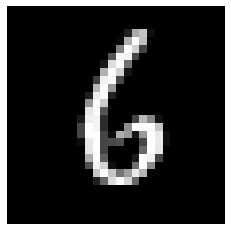

In [14]:
drawImg(query_point)

In [15]:
print(knn(X, Y, query_point, 10))

6.0


# Calculating Accuracy of KNN

total_cases = x_test.shape[0]  
correct_pred = 0  
  
for i in range(total_cases) :  
    if knn(X, Y, x_test[i], 15) == y_test[i] :  
        correct_pred += 1  
  
accuracy = (correct_pred / total_cases) * 100  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


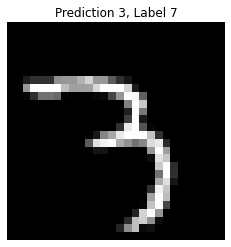

29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


In [ ]:
total_cases = x_test.shape[0]
correct_pred2 = 0

for i in range(total_cases) :
    pred = int(knn(X, Y, x_test[i], 15))
    actual = y_test[i]
    if pred == actual :
        print(i + 1)
        correct_pred2 += 1
    else :
        drawImg(x_test[i], pred, actual)

accuracy2 = (correct_pred2 * 100 / total_cases)

In [39]:
print(accuracy2)

100.0


In [ ]:
total_cases2 = 10
correct_pred2 = 0

for i in range(total_cases2) :
    if knn(X, Y, x_test[i], 15) == y_test[i] :
        correct_pred2 += 1

accuracy2 = (correct_pred2 / total_cases2) * 100